<a href="https://colab.research.google.com/github/AlenaResiko/Project_curvature/blob/main/Estimate_curvature_4_Dec_15_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx
import pickle
import statistics

import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install POT
import ot

/usr/local/lib/python3.10/dist-packages/ot/backend.py:2998: UserWarning: To use TensorflowBackend, you need to activate the tensorflow numpy API. You can activate it by running: 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
  register_backend(TensorflowBackend())


### Functions

In [62]:
# Distribute uniform probabilities among vertices that are <= delta away from nodes n
def distribute_probabilities(D, n1, delta): # delta is ball radius - set it a bit greater than connection threshold
  probabilities = np.zeros(n_points)
  count = 0
  for n2 in range(n_points):
    if D[n1][n2]<delta and n1!=n2:
      probabilities[n2] = 1
      count += 1
  if count>0:
    probabilities /= count
    return probabilities
  else:
      print("Node ", n1, " has degree 0.")
      return np.zeros(n_points)

In [63]:
def findEdgeOTDist(D, n1, n2):
  if D[n1][n2] > epsilon:
    return 0
  n1_prob = distribute_probabilities(D=D, n1=n1, delta=D[n1][n2])
  n2_prob = distribute_probabilities(D=D, n1=n2, delta=D[n1][n2])
  if n1_prob.any() and n2_prob.any():
    return ot.emd2(n1_prob, n2_prob, D)
  else:
    print("Tried to compute edge over nodes with 0 probabilities.")
    return 0

In [64]:
def curvature_random_edges(count, n_points, G, D):
  edge_curvatures = np.zeros((n_points, n_points))
  for _ in range(count):
    n1 = random.randint(0, n_points)
    ind = random.randint(0, G.degree(n1)-1)
    n2 = list(G.neighbors(n1))[ind]
    Wd = findEdgeOTDist(D=D, n1=n1, n2=n2)
    print("Wasserstein distance: ", Wd)
    print("Geodesic distance: ", D[n1][n2])
    edge_curvatures[n1][n2] = 1 - Wd/D[n1][n2]
    print("Curvature of edge between " + str(n1) + " and " + str(n2) + " is " + str(edge_curvatures[n1][n2]))
  return edge_curvatures

In [65]:
def display_curvatures(c):
  c_processed = c.flatten()
  data = c_processed[np.where(c_processed!=0)]
  plt.hist(data, bins=30, color='skyblue', edgecolor='black')
  plt.xlabel('Curvatures')
  plt.ylabel('Frequency')
  plt.title('Edge curvatures Histogram')
  plt.show()

  print("Stats: ")
  print("Sampled ", len(data), " edges.")
  print("Mean: ", data.mean())
  print("Std: ", data.std())

#### Sphere

In [ ]:
n_points = 3162
epsilon = 1/n_points**(0.16)
print(n_points, epsilon)

3162 0.2754267398412311


In [ ]:
G_S = pickle.load(open("/content/drive/MyDrive/Curvature Project/Graphs_0/G_S_2d.pickle", 'rb'))
print("G loaded - ", G_S)
D_S = np.load('/content/drive/MyDrive/Curvature Project/Graphs_0/D_S_2d.npy')
print("D loaded - ", D_S)

G loaded -  Graph with 3162 nodes and 94299 edges
D loaded -  [[0.         0.95480812 0.86371887 ... 2.37759782 1.50053148 2.21196589]
 [0.95480812 0.         0.60239247 ... 2.84372703 1.62959806 1.26551939]
 [0.86371887 0.60239247 0.         ... 2.37917726 1.04868747 1.45847948]
 ...
 [2.37759782 2.84372703 2.37917726 ... 0.         1.33394139 1.63568555]
 [1.50053148 1.62959806 1.04868747 ... 1.33394139 0.         1.58569016]
 [2.21196589 1.26551939 1.45847948 ... 1.63568555 1.58569016 0.        ]]


In [ ]:
count = 300
c = curvature_random_edges(count=count, n_points=n_points, G=G_S, D=D_S)

Wasserstein distance:  0.18005047226289417
Geodesic distance:  0.17992932734770553
Curvature of edge between 2374 and 263 is -0.0006732916583105375
Wasserstein distance:  0.1804073568412747
Geodesic distance:  0.1637166961329988
Curvature of edge between 2840 and 1755 is -0.10194843349829696
Wasserstein distance:  0.15536959186870525
Geodesic distance:  0.13427045296187157
Curvature of edge between 2281 and 1142 is -0.15713910574819567
Wasserstein distance:  0.16068098272780654
Geodesic distance:  0.1764780554907596
Curvature of edge between 14 and 2067 is 0.0895129579653613
Wasserstein distance:  0.2721224136038346
Geodesic distance:  0.2364170191850615
Curvature of edge between 3039 and 1096 is -0.15102717453189696
Wasserstein distance:  0.12824949664943805
Geodesic distance:  0.15129050654045936
Curvature of edge between 503 and 379 is 0.15229646868066704
Wasserstein distance:  0.12029933882797193
Geodesic distance:  0.14930034204753273
Curvature of edge between 2885 and 802 is 0.19

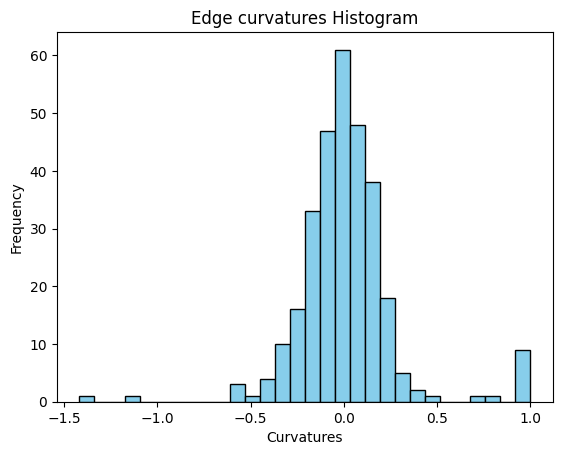

Stats: 
Sampled  300  edges.
Mean:  0.009860018063586003
Std:  0.2685358882972893


In [ ]:
display_curvatures(c)

#### Flat Torus

In [ ]:
n_points = 3162
epsilon = 1/n_points**(0.16)
print(n_points, epsilon)

3162 0.2754267398412311


In [ ]:
G_FT = pickle.load(open("/content/drive/MyDrive/Curvature Project/Graphs_0/G_FT.pickle", 'rb'))
print("G loaded", G_FT)
D_FT = np.load('/content/drive/MyDrive/Curvature Project/Graphs_0/D_FT.npy')
print("D loaded - ", D_FT)

G loaded Graph with 3162 nodes and 1190613 edges
D loaded -  [[0.         0.4067369  0.36518773 ... 0.65806853 0.35885055 0.29122129]
 [0.4067369  0.         0.42252431 ... 0.30894379 0.28006836 0.30679959]
 [0.36518773 0.42252431 0.         ... 0.32499448 0.14928871 0.12304432]
 ...
 [0.65806853 0.30894379 0.32499448 ... 0.         0.44901266 0.44675745]
 [0.35885055 0.28006836 0.14928871 ... 0.44901266 0.         0.07675087]
 [0.29122129 0.30679959 0.12304432 ... 0.44675745 0.07675087 0.        ]]


In [ ]:
count = 300
c = curvature_random_edges(count=count, n_points=n_points, G=G_FT, D=D_FT)

Wasserstein distance:  0.10135385059687325
Geodesic distance:  0.09910588439823953
Curvature of edge between 2419 and 1299 is -0.022682469484865964
Wasserstein distance:  0.15258093155015393
Geodesic distance:  0.1537278516984279
Curvature of edge between 1786 and 858 is 0.007460717987030185
Wasserstein distance:  0.20522880435824675
Geodesic distance:  0.2628700251099591
Curvature of edge between 2821 and 1224 is 0.21927650643165153
Wasserstein distance:  0.16847831224263618
Geodesic distance:  0.160934635456909
Curvature of edge between 1926 and 1211 is -0.046874165802221146
Wasserstein distance:  0.18295806837780518
Geodesic distance:  0.18615822858766823
Curvature of edge between 1025 and 2537 is 0.017190538576466907
Wasserstein distance:  0.12025430025182114
Geodesic distance:  0.1391620210769389
Curvature of edge between 115 and 2697 is 0.13586839770503323
Wasserstein distance:  0.22737853025819305
Geodesic distance:  0.2524577523181648
Curvature of edge between 2269 and 213 is 0

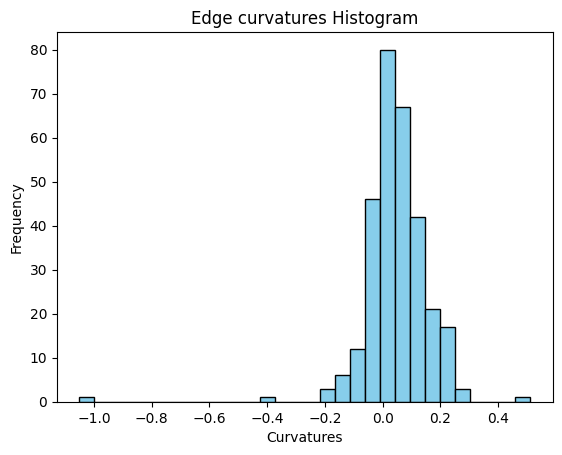

Stats: 
Sampled  300  edges.
Mean:  0.04725461573480361
Std:  0.11265079627110078


In [ ]:
display_curvatures(c)

#### Poincare disk

In [59]:
n_points = 10000
epsilon = 1/n_points**(0.16)
print(n_points, epsilon)

10000 0.2290867652767773


In [60]:
G_P = pickle.load(open("/content/drive/MyDrive/Curvature Project/Graphs_0/G_P.pickle", 'rb'))
print("G loaded - ", G_P)
D_P = np.load('/content/drive/MyDrive/Curvature Project/Graphs_0/D_P.npy')
print("D loaded - ", D_P)

G loaded -  Graph with 3162 nodes and 310697 edges
D loaded -  [[0.         0.48468961 1.1619997  ... 1.07858012 1.17802826 0.29316655]
 [0.48468961 0.         1.36554893 ... 1.37410143 1.28201685 0.5957202 ]
 [1.1619997  1.36554893 0.         ... 0.34815027 0.34187874 0.86994766]
 ...
 [1.07858012 1.37410143 0.34815027 ... 0.         0.6595129  0.80767793]
 [1.17802826 1.28201685 0.34187874 ... 0.6595129  0.         0.89072898]
 [0.29316655 0.5957202  0.86994766 ... 0.80767793 0.89072898 0.        ]]


In [67]:
count = 300
c = curvature_random_edges(count=count, n_points=n_points, G=G_P, D=D_P)

NetworkXError: ignored